# CCSNe Example

In [1]:
import simple
import os, logging

logging.basicConfig(level=logging.INFO)
overwrite_existing = False
defaults = simple.load_defaults('test.yaml')

models = simple.load_collection(**defaults['load_models'], overwrite=overwrite_existing)
models

INFO:SIMPLE.models:Loading file: test.hdf5
INFO:SIMPLE.models:Loading model1: Ri18_m15 (CCSNe)
INFO:SIMPLE.models:Loading model1: iniab2.0E-02GN93 (IsoRef)
INFO:SIMPLE.models:Loading model1: W17 (IsoRef)
INFO:SIMPLE.models:Loading model1: Ri18_m20 (CCSNe)
INFO:SIMPLE.models:Loading model1: Ri18_m25 (CCSNe)
INFO:SIMPLE.models:Loading model1: Pi16_m15 (CCSNe)
INFO:SIMPLE.models:Loading model1: iniab2.0E-02GN93_Lo03 (IsoRef)
INFO:SIMPLE.models:Loading model1: Pi16_m20 (CCSNe)
INFO:SIMPLE.models:Loading model1: Pi16_m25 (CCSNe)
INFO:SIMPLE.models:Loading model1: La22_m15 (CCSNe)
INFO:SIMPLE.models:Loading model1: La22_m20 (CCSNe)
INFO:SIMPLE.models:Loading model1: La22_m25 (CCSNe)
INFO:SIMPLE.models:Loading model1: Si18_m15 (CCSNe)
INFO:SIMPLE.models:Loading model1: iniab1.3E-02Lo03_Lo03_merged (IsoRef)
INFO:SIMPLE.models:Loading model1: Si18_m20 (CCSNe)
INFO:SIMPLE.models:Loading model1: Si18_m25 (CCSNe)
INFO:SIMPLE.models:Loading model1: Ra02_m15 (CCSNe)
INFO:SIMPLE.models:Loading model1

In [2]:
models[0]

'mass'

---
This does the internal normalisation and solar - 1 normalisation.
These are avaliable through the ``intnorm`` and ``simplenorm`` attributes on each model after this. Each of these attributes is a dict containing the result of the calculations. 

For internally normalised the main result is called ``eRi`` which is contains the internally normalised data. Note that unlike this result has not been divided by one of the ratios to create slopes. To get a slope you have to do that manually (See example below). This way we can use whatever slope we want without rerunning the calculation and we have the direction as well. 

For the solar - 1 normalisation the main result is called ``Ri``.

In [3]:
models.internal_normalisation(**defaults['internal_normalisation'])
models.simple_normalisation(**defaults['simple_normalisation'])

INFO:SIMPLE.norm:Internally normalising 3676 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 4094 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 3976 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 732 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 678 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 736 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 949 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 1298 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 1385 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 365 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 486 rows using the largest offset method.
INFO:SIMPLE.norm:Internally normalising 473 rows using the largest offset method.
INFO:SIMPLE

---
# Plotting

Plot-a-doodle-doo

In [3]:
import matplotlib.pyplot as plt
import numpy as np

colors=simple.ccsne.all_colors
linestyles = simple.ccsne.all_linestyles
markers = simple.ccsne.all_markers

This looks pretty much the same as the one from Gabors notebook.
The X values are lower because the values have been divided by the mass here and not in gabors notebook.
Also seems I have not cut off the lower masscoordinates in the Ritter model

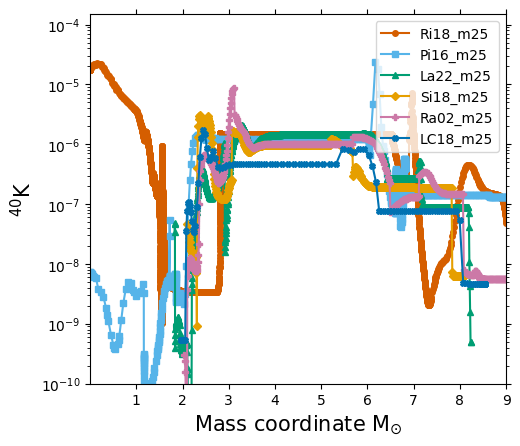

In [6]:
ifig=24
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('K-40')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.semilogy(model.masscoord, model.abundance[iso],
                 color=colors[i], marker=markers[i], markersize=4,ls="-",
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),9)
plt.ylim(1e-10,1.5e-4)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(iso.latex(),fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()

(-1.0, 1.0)

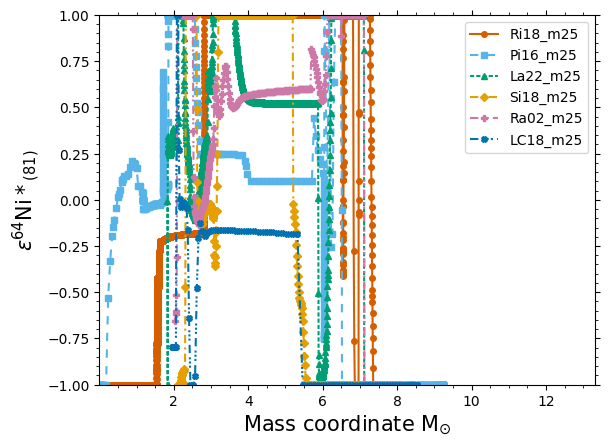

In [10]:
# I put the plotting fucntion within the ccsne namespace since they are specific to these models types.
simple.ccsne.plot_intnorm(models, 'Ni-64*', where='.mass==25', marker=True)
plt.ylim(-1,1)

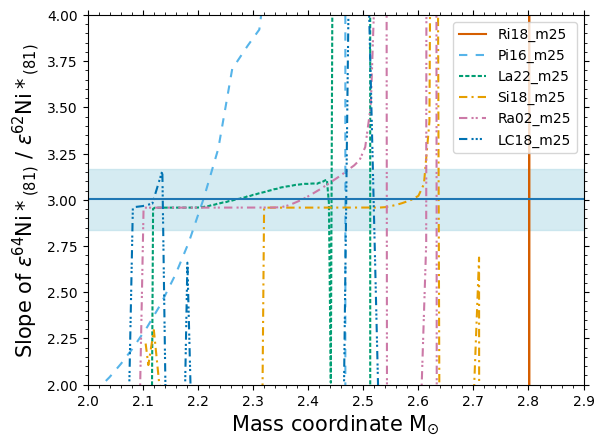

In [12]:
simple.ccsne.plot_intnorm(models, 'Ni-64*/Ni-62*', where='.mass==25')
plt.ylim(-10,15)

plt.xlim(2,2.9)
plt.ylim(2,4)
plt.hlines(3.003,0,10)
x = np.linspace(0, 10, 100)
plt.fill_between(x, 3.003-0.166, 3.003+0.166, color='lightblue', alpha=0.5)

INFO:root:Calculating the onion structure for: Ra02_m25
INFO:root:m_cut: 2.0412267471091
INFO:root:massmax: 13.07983911513323
INFO:root:Lower boundary of the H shell: 8.480844645550528
INFO:root:Lower boundary of the He/N shell: 8.086425339366516
INFO:root:Lower boundary of the He/C shell: 7.109602815485168
INFO:root:Lower boundary of the O/C shell: 5.693413775766717
INFO:root:Lower boundary of the O/Ne shell: 3.2709602815485166
INFO:root:Lower boundary of the O/Si layer: 2.5138260432378075
INFO:root:Lower boundary of the Si layer: 2.1618903971845147
INFO:root:Lower boundary of the Ni layer: 2.0412267471091


H 8.480844645550528 9.0 3.0
trying
HeN 8.086425339366516 8.480844645550528 3.0
trying
HeC 7.109602815485168 8.086425339366516 3.0
trying
OC 5.693413775766717 7.109602815485168 3.0
trying
ONe 3.2709602815485166 5.693413775766717 3.0
trying
OSi 2.5138260432378075 3.2709602815485166 3.0
trying
Si 2.1618903971845147 3.0 3.0
Ni 2.0412267471091 3.0 3.0


Text(0.5, 1.0, '')

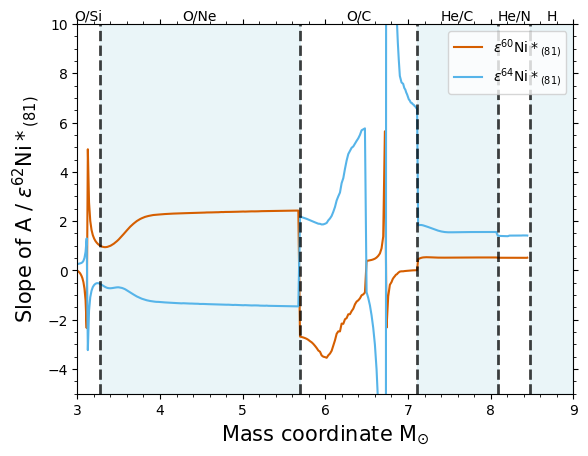

In [2]:
plt.ylim(-15,25) 
simple.ccsne.plot_intnorm(models, **defaults['plot_slopes_example'])
simple.ccsne.plot_onion_structure(models[8])
plt.title(None)
#plt.xlim(5.5,9)


In [9]:
simple.ccsne.plot_slopes(models, **defaults['plot_slopes_example'])
plt.xlim(5.5,9)
plt.ylim(-15,25)

AttributeError: module 'simple.ccsne' has no attribute 'plot_slopes'

In [ ]:
# plot solar isotopes_or_ratios - 1 for selected isotopes, for different models
ifig=26
plt.figure(ifig).clear(); plt.figure(ifig)

iso = simple.asisotope('Ni-64*')

masscut = []
for i, model in enumerate(models.where('.mass==25')):
    plt.plot(model.masscoord, model.simplenorm['Ri'][iso],
                 color=colours[i], marker=markers[0], markersize=4,ls=linestyles[0],
                 label=f'{model.name}')
    masscut.append(np.min(model.masscoord))
plt.legend(loc='upper right')

plt.xlim(np.min(masscut),6)
plt.ylim(0,100)
plt.xlabel('Mass coordinate M$_{\odot}$', fontsize=15)
plt.ylabel(f'{models[0].simplenorm["label_latex"][iso]}/solar -1',fontsize=15)
plt.tick_params(left=True,right=True,top=True,labelleft=True,which='both') #,labelright=True)

plt.gcf().subplots_adjust(left=0.25)    

plt.show()